### NLP Assignmnent w/ K-means Clustering
### Employee ID : 2113702
### Employee Name: Vinayak Mathur

# Importing Libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import boto3
from sagemaker import get_execution_role

In [3]:
!pip install spacy
!python -m spacy download en_core_web_lg

  Using cached spacy-3.3.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.2 MB)
  Using cached cymem-2.0.6-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35 kB)
  Using cached murmurhash-1.0.7-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21 kB)
  Using cached thinc-8.0.17-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (660 kB)
  Using cached typer-0.4.1-py3-none-any.whl (27 kB)
  Using cached pydantic-1.8.2-cp37-cp37m-manylinux2014_x86_64.whl (10.1 MB)
  Using cached blis-0.7.7-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached preshed-3.0.6-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (125 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Using cached spacy_legacy-3.0.9-py2.py3-none-any.whl (20 kB)
  Using cached wasabi-0.9.1-py3-none-any.whl (

In [4]:
import spacy
nlp = spacy.load(name = 'en_core_web_lg')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading all files in S3 Bucket:

In [5]:
# defining bucket and folders:
bucket = 'aws-3700-bucket'
subfolder = 'files/'
resfolder = 'Results/'

In [6]:
#Get permission to read from S3 buckets
role = get_execution_role()

In [7]:
#creating a connection
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
#listing files available in the bucket.
for f in contents:
    print(f['Key'])

files/201801-fordgobike-tripdata.csv
files/201802-fordgobike-tripdata.csv
files/201803-fordgobike-tripdata.csv
files/American_gangster.txt
files/Joseph.txt
files/Palazzo_colonna.txt
files/eucalyptus.txt
files/spotify00-19-1.csv
files/spotify00-19-2.csv
files/throttle.txt


In [8]:
s3 = boto3.resource('s3')
bucket = s3.Bucket(bucket)

In [9]:
# Retrieving The Content of the files:
resbody = ""
for obj in bucket.objects.all():
    key = obj.key
    #print(str(key))
    if str(key) in ['files/American_gangster.txt', 'files/Joseph.txt', 'files/Palazzo_colonna.txt', 'files/eucalyptus.txt', 'files/throttle.txt']:
        body = obj.get()['Body'].read()
        print(body.decode("utf-8"))
        resbody += body.decode("utf-8")


American Gangster is the tenth studio album by American rapper Jay-Z. It was conceived as a concept album—inspired by the 01/01/2007 film of the same name—and was released on November 6 of that year through Roc-A-Fella Records. The album features production from Diddy & The Hitmen, Just Blaze, and The Neptunes, among others. It also includes guest appearances by Beanie Sigel, Lil Wayne, Pharrell, and Nas. The album's production is built around 1970s soul and funk, with instruments featured on the album played by professional musicians including, horns, string arrangements, drummers, and unconventional percussion created with bottles. The album's theme is based around the gangster lifestyle, the American Dream, and Jay-Z's memories of growing up in Brooklyn, New York's Marcy.

American Gangster received widespread critical acclaim and was viewed by music critics as a return to Jay-Z's best form following the critical disappointment of Kingdom Come (2006). It was ranked among the best al

# Storing the Result in txt file

In [10]:
# Writing combined to result file:
s3.Object('aws-3700-bucket', 'Results/combined.txt').put(Body = resbody)

{'ResponseMetadata': {'RequestId': 'JX2FR8P8W471EFV6',
  'HostId': 'UGpVXrygiu6CS5yIsuVt97/QYnwA8Y8Q0YeYfB3WfNAXM4rTu8FzSqvmwpy1Qql83t4rjisbqsE=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'UGpVXrygiu6CS5yIsuVt97/QYnwA8Y8Q0YeYfB3WfNAXM4rTu8FzSqvmwpy1Qql83t4rjisbqsE=',
   'x-amz-request-id': 'JX2FR8P8W471EFV6',
   'date': 'Wed, 15 Jun 2022 11:18:29 GMT',
   'etag': '"58174a4564e07949ff2e73853a3dd811"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"58174a4564e07949ff2e73853a3dd811"'}

# Parsing the text:

In [11]:
# Parsing the Body:
doc = nlp(resbody)

In [12]:
# Printing Sentences:
for sent in doc.sents:
    print(sent.text)

American Gangster is the tenth studio album by American rapper Jay-Z. It was conceived as a concept album—inspired by the 01/01/2007 film of the same name—and was released on November 6 of that year through Roc-A-Fella Records.
The album features production from Diddy & The Hitmen, Just Blaze, and The Neptunes, among others.
It also includes guest appearances by Beanie Sigel, Lil Wayne, Pharrell, and Nas.
The album's production is built around 1970s soul and funk, with instruments featured on the album played by professional musicians including, horns, string arrangements, drummers, and unconventional percussion created with bottles.
The album's theme is based around the gangster lifestyle, the American Dream, and Jay-Z's memories of growing up in Brooklyn, New York's Marcy.


American Gangster received widespread critical acclaim and was viewed by music critics as a return to Jay-Z's best form following the critical disappointment of Kingdom Come (2006).
It was ranked among the best a

In [13]:
# Number of sentences in the document
print(len(list(doc.sents)))

112


# Cleaning the Text:
## Removing the STOP WORDS and Performing Stemming of the words:

In [14]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [16]:
stem_body = clean_text(resbody)
print(stem_body)

american gangster tenth studio album american rapper jayz conceiv concept albuminspir film nameand releas novemb year rocafella record album featur product diddi hitmen blaze neptun among other also includ guest appear beani sigel lil wayn pharrel na album product built around soul funk instrument featur album play profession musician includ horn string arrang drummer unconvent percuss creat bottl album theme base around gangster lifestyl american dream jayz memori grow brooklyn new york marcyamerican gangster receiv widespread critic acclaim view music critic return jayz best form follow critic disappoint kingdom come rank among best album sever public yearend list includ austin chronicl rank number one roll stone also name album second singl roc boy winner best song album also commerci success debut number one us billboard sell copi first week may cost like becam jayz tenth number one album tie elvi presley second numberon album chart month releas certifi platinum record industri ass

# Storing Final text in the Results Folder

In [17]:
# Writing to result file:
s3.Object('aws-3700-bucket', 'Results/result.txt').put(Body = stem_body)

{'ResponseMetadata': {'RequestId': 'HTYP0RD5ZCJ3BR3X',
  'HostId': 'Rn73A3lO3ig5vQZfvjltVojGqpac556tAjlx1gWBVr5FbeSrePoQ3a2r2Sw977aHzQ9lJXWkk+A=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Rn73A3lO3ig5vQZfvjltVojGqpac556tAjlx1gWBVr5FbeSrePoQ3a2r2Sw977aHzQ9lJXWkk+A=',
   'x-amz-request-id': 'HTYP0RD5ZCJ3BR3X',
   'date': 'Wed, 15 Jun 2022 11:19:50 GMT',
   'etag': '"31a70e956eda4d3a35883be3818369c3"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"31a70e956eda4d3a35883be3818369c3"'}

# Label Encoding of the Words:

In [18]:
labelencoder = LabelEncoder()
encoded_data = labelencoder.fit_transform(stem_body.split())
print(encoded_data)

[ 28 325 789 ... 100 759 186]


# K-means Clustering :

In [27]:
x = encoded_data.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state = 42).fit(x)
y = kmeans.predict(x)
y

array([1, 3, 2, ..., 1, 2, 1], dtype=int32)

In [28]:
x

array([[ 28],
       [325],
       [789],
       ...,
       [100],
       [759],
       [186]])

In [20]:
print(kmeans.cluster_centers_)

[[537.71867008]
 [ 99.44235925]
 [780.19095477]
 [319.21813031]]


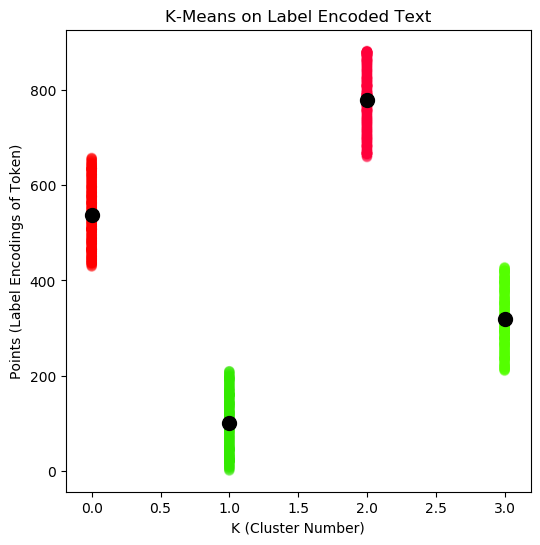

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(y, [i for i in encoded_data], c=y, cmap='prism', marker='.', s=180, alpha=0.2)
plt.scatter([0,1,2,3], kmeans.cluster_centers_,  color='black', marker='o', s=100)
plt.xlabel('K (Cluster Number)')
plt.ylabel('Points (Label Encodings of Token)')
plt.title('K-Means on Label Encoded Text')
plt.show()